<a href="https://colab.research.google.com/github/rishabhr136/Deep_Learning/blob/main/Image_Identification_By_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
train_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
train_images = train_images/255
test_images = test_images/255

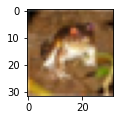

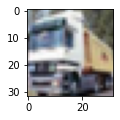

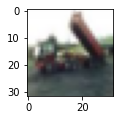

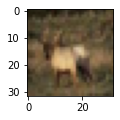

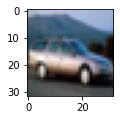

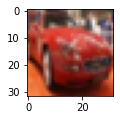

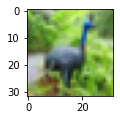

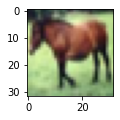

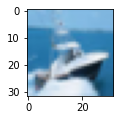

In [6]:
for i in range(9):
    plt.figure(figsize=(9,7))
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i])

In [7]:
class_names = ["Cat","Truck","Automobile","Deer","Zeep","Car","Bird","Horse","Ship"]

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [12]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [13]:
model_fit = model.fit(train_images,train_labels,epochs=4,validation_data=(test_images,test_labels))

Epoch 1/4
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5442 - accuracy: 0.4360 - val_loss: 1.2941 - val_accuracy: 0.5291
Epoch 2/4
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1845 - accuracy: 0.5789 - val_loss: 1.1350 - val_accuracy: 0.5976
Epoch 3/4
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0359 - accuracy: 0.6354 - val_loss: 1.0123 - val_accuracy: 0.6452
Epoch 4/4
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9400 - accuracy: 0.6689 - val_loss: 0.9729 - val_accuracy: 0.6566


In [14]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9729 - accuracy: 0.6566
0.6565999984741211


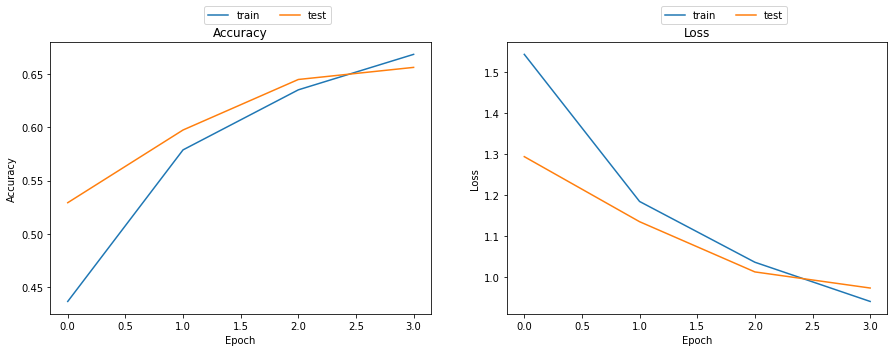

In [17]:
#now let's do some visualization
fig ,axes =plt.subplots(1,2,figsize=(15,5))

axes[0].plot(model_fit.history['accuracy'])
axes[0].plot(model_fit.history['val_accuracy']) 
axes[0].set_title('Accuracy')
axes[0].set_ylabel('Accuracy') 
axes[0].set_xlabel('Epoch')
axes[0].legend(['train', 'test'], bbox_to_anchor =(0.75, 1.15), ncol = 2)

axes[1].plot(model_fit.history['loss']) 
axes[1].plot(model_fit.history['val_loss']) 
axes[1].set_title('Loss')
axes[1].set_ylabel('Loss') 
axes[1].set_xlabel('Epoch')
axes[1].legend(['train', 'test'], bbox_to_anchor =(0.75, 1.15), ncol = 2)


plt.show()

    

In [23]:
pred_img = model.predict(test_images)

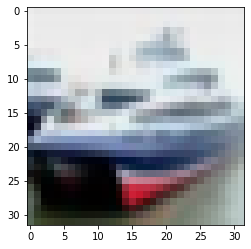

In [28]:
plt.imshow(test_images[1])

In [29]:
class_names[np.argmax(pred_img[1])]

'Ship'

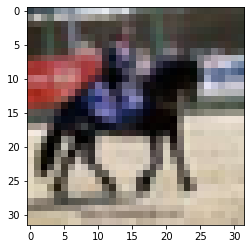

In [37]:
plt.imshow(test_images[5000])

In [38]:
class_names[np.argmax(pred_img[5000])]

'Horse'